# Front Matter: CASA0013: Foundations of Spatial Data Science

## Reproducable Analysis

### Student ID:20167595


# Reproducible Analysis

## 1. 2020 Airbnb Data

In [1]:
# Import 2020 Inside Airbnb Data

# Set download URL
url = 'https://github.com/jreades/i2p/raw/master/data/src/2020-08-24-listings.csv.gz'

# import pandas
import pandas as pd
df = pd.read_csv(url, compression='gzip', low_memory=False)

#Print number of rows and columns
print(f"Data frame is {df.shape[0]:} x {df.shape[1]}")

Data frame is 74188 x 74


In [2]:
df = pd.read_csv(url, compression='gzip', low_memory=False)

#Print number of rows and columns
print(f"Data frame is {df.shape[0]:} x {df.shape[1]}")

Data frame is 74188 x 74


In [3]:
#Save inside Airbnb Data Locally

import os

# set a default path location to save your file
path = os.path.join('data','raw') 
# it splits the url and accesses the last item in the url.. the file name
fn   = url.split('/')[-1]         
print(f"Writing to: {fn}")

Writing to: 2020-08-24-listings.csv.gz


In [4]:
# used to check whether the specified path exists or not.
#create a path under the current working directory(here)
if not os.path.exists(path):                              
    print(f"Creating {path} under {os.getcwd()}")           
    #if the path doesnt exist then make the path directory using makedir.
    os.makedirs(path)                                       

#we have the datafram, but now we are creating csv from this dataframe
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Done.


In [5]:
#print df columns 
print(list(df.columns.values))   

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

#### Select columns we want

In [6]:
#lets select only the columns we want to use for 2020 Airbnb

cols = ['latitude', 'longitude', 
        'room_type','price', 'minimum_nights' , 'calculated_host_listings_count', 'reviews_per_month', 'availability_365', 'number_of_reviews_ltm']

In [7]:
#del(df) to ensure that we aren't accidentally using the 'old' data frame
del(df)
df = pd.read_csv(os.path.join(path,fn),
                 low_memory=False, 
                 usecols=cols)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 74,188 x 9


In [8]:
#have a look at the df
df.sample(6, random_state=42) 

,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month
36626,51.47934,-0.01041,Entire home/apt,$170.00,1.0,0.0,0.0,1.0,0.04
54419,51.50662,-0.00643,Entire home/apt,$75.00,2.0,0.0,10.0,1.0,0.93
27090,51.40679,-0.06675,Private room,$18.00,1.0,0.0,0.0,2.0,0.06
71147,51.47549,-0.29011,Entire home/apt,$410.00,7.0,358.0,0.0,22.0,NaN
43164,51.49211,-0.16999,Entire home/apt,$250.00,1.0,90.0,0.0,2.0,NaN
7480,51.53434,-0.22101,Entire home/apt,$200.00,3.0,0.0,0.0,1.0,0.03


#### Check for nan values

In [9]:
df.info()
#we can see most rows are non-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74188 entries, 0 to 74187
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        74186 non-null  float64
 1   longitude                       74186 non-null  float64
 2   room_type                       74186 non-null  object 
 3   price                           74186 non-null  object 
 4   minimum_nights                  74186 non-null  float64
 5   availability_365                74186 non-null  float64
 6   number_of_reviews_ltm           74186 non-null  float64
 7   calculated_host_listings_count  74184 non-null  float64
 8   reviews_per_month               53901 non-null  float64
dtypes: float64(7), object(2)
memory usage: 5.1+ MB


In [10]:
#extract the rows where lat and long columns show nan values
df[df.latitude.isna()  | df.longitude.isna()] 

,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month
3558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#lets drop them
#axis 0 refers to dropping the row(index).

df.drop(df[df.latitude.isna()].index.values, axis=0, inplace=True) 
df.drop(df[((df.latitude < 40)|(df.longitude > 1))].index, axis=0, inplace=True)


In [12]:
#check the nan values
df[df.calculated_host_listings_count.isna()]
#drop them
df.drop(df[df.calculated_host_listings_count.isna()].index.values, axis=0, inplace=True) 

In [13]:
print(f"Updated Data frame is {df.shape[0]:,} x {df.shape[1]}")

Updated Data frame is 74,184 x 9


#### Lets check null values

In [14]:
#now lets check null values
df.isnull().sum(axis=0)

#we can see there are no null values in any of the columns

latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
availability_365                      0
number_of_reviews_ltm                 0
calculated_host_listings_count        0
reviews_per_month                 20283
dtype: int64

#### Lets update data types

In [15]:
#convert roomtype from object to category type
cats = ['room_type']
df.sample(5, random_state=43)[cats]

,room_type
11126,Entire home/apt
71277,Entire home/apt
10729,Entire home/apt
23465,Private room
65258,Private room


In [16]:
#for all rows cat[0] which is propert type  count the values
df[cats[0]].value_counts()  

Entire home/apt    40853
Private room       32163
Shared room          592
Hotel room           576
Name: room_type, dtype: int64

In [17]:
#select columns to convert to categorical
cats = ['room_type']

#for every column in cats, convert the data datype to 'category'
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting room_type


In [18]:
#Now lets deal with string (price column)

money = ['price']
df.sample(5, random_state=42)[money]

for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','').str.replace(',','').astype('float')

Converting price


/tmp/ipykernel_15206/1405184439.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[m] = df[m].str.replace('$','').str.replace(',','').astype('float')


In [19]:
#lets look at a sample:
df.sample(5, random_state=42)[money]

,price
66121,89.0
58701,125.0
53195,27.0
64796,169.0
46074,70.0


In [20]:
#dealing with integers. lets convert float to integer

ints  = ['minimum_nights', 'calculated_host_listings_count']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("\tConverting to unsigned 16-bit integer.")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())


Converting minimum_nights
Converting calculated_host_listings_count


In [21]:
#have a look at the df
df.head()

,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month
0,51.46225,-0.11732,Entire home/apt,87.0,2,236.0,8.0,2,1.51
1,51.56802,-0.11121,Private room,49.0,1,364.0,5.0,3,0.17
2,51.48796,-0.16898,Entire home/apt,75.0,10,359.0,3.0,1,0.68
3,51.52195,-0.14094,Entire home/apt,208.0,4,1.0,1.0,14,0.37
4,51.47935,-0.19743,Private room,150.0,3,364.0,0.0,2,NaN


#### Select listings > 0 Reviews

In [22]:
#74187 listings. lets select only active listings. reviews > 0. indicator of active listings

df = df[(df.number_of_reviews_ltm > 0)]

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")
#now we have 33,887 listings

Data frame is 33,887 x 9


#### 2020 monthly revenue
Lets calculate the revenue by multiplying minimum_nights, reviews_per_month, price

In [23]:
df['2020_monthly_revenue'] = (df.minimum_nights * df.reviews_per_month * df.price)


## 2. MSOA data

In [24]:
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

<AxesSubplot:>

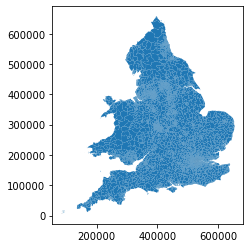

In [25]:
#read in msoa data and plot it to visualize
msoas = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip?raw=true')
msoas.plot()

In [26]:
#read in london boroughs
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


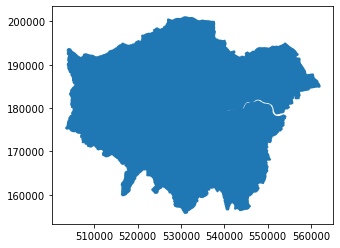

In [27]:
#extracting outline using unary_union

ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

# In order to ensure that we get all MSOAs _within_ London 
# we will buffer the boundary by 250m. If _cover_ were 
# easier to use then that option might be preferable.
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();

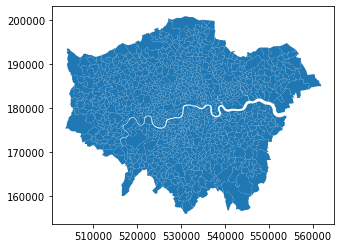

In [28]:
#now we want to use spatial join from geopandas. msoas within lonond, and will join

ldn_msoas = gpd.sjoin(msoas, ldn, op='within')
ldn_msoas.plot();

In [29]:
#have a look at the top few rows
ldn_msoas.head()
#print(f"Data frame is {ldn_msoas.shape[0]:,} x {ldn_msoas.shape[1]}")

,OBJECTID,MSOA11CD,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,index_right,original
0,1,E02000001,City of London 001,City of London 001,532384,181355,-0.093490,51.51561,2.906361e+06,8936.818478,"POLYGON ((532135.138 182198.131, 532158.250 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,548267,189685,0.138756,51.58652,2.166163e+06,8150.405928,"POLYGON ((548881.563 190845.265, 548881.125 19...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,548259,188520,0.138149,51.57605,2.143568e+06,9118.196243,"POLYGON ((549102.438 189324.625, 548954.517 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,551004,186412,0.176828,51.55638,2.491467e+06,8206.551627,"POLYGON ((551550.056 187364.705, 551478.000 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,548733,186824,0.144267,51.56069,1.186053e+06,6949.688798,"POLYGON ((549099.634 187656.076, 549161.375 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."


#### Add msoa and borough name

In [30]:
#Read in msoa data
msoa_nms = pd.read_csv('https://github.com/jreades/i2p/blob/master/data/src/MSOA-Names-1.8.csv.gz?raw=true', compression='gzip')

In [31]:
#lets have a look at the names
print(msoa_nms.columns.values)
msoa_nms.sample(3, random_state=42)
#print(f"Data frame is {msoa_nms.shape[0]:,} x {msoa_nms.shape[1]}")

['msoa11cd' 'msoa11nm' 'msoa11nmw' 'msoa11hclnm' 'msoa11hclnmw' 'Laname']


,msoa11cd,msoa11nm,msoa11nmw,msoa11hclnm,msoa11hclnmw,Laname
4512,E02005951,Oxford 012,Oxford 012,Grandpont & New Hinksey,NaN,Oxford
4660,W02000113,Powys 017,Powys 017,Brecon,Aberhonddu,Powys
1038,W02000309,Caerphilly 020,Caerffili 020,Bedwas & Trethomas,Bedwas a Thretomas,Caerphilly


In [32]:
#lets merge them to get names
msoas = pd.merge(ldn_msoas, msoa_nms,
                 left_on = 'MSOA11CD',
                 right_on = 'msoa11cd',
                 how = 'inner')

print(msoas.shape)
print(type(msoas))

(983, 19)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [33]:
#drop columns we dont need
msoas.drop(['BNG_E','BNG_N','Shape__Len','index_right', 'original', 'msoa11cd' , 'msoa11hclnmw'], axis=1, inplace=True)

In [34]:
#look at the msoas data
msoas.head()

,OBJECTID,MSOA11CD,MSOA11NM,MSOA11NMW,LONG,LAT,Shape__Are,geometry,msoa11nm,msoa11nmw,msoa11hclnm,Laname
0,1,E02000001,City of London 001,City of London 001,-0.093490,51.51561,2.906361e+06,"POLYGON ((532135.138 182198.131, 532158.250 18...",City of London 001,City of London 001,City of London,City of London
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,0.138756,51.58652,2.166163e+06,"POLYGON ((548881.563 190845.265, 548881.125 19...",Barking and Dagenham 001,Barking and Dagenham 001,Marks Gate,Barking and Dagenham
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,0.138149,51.57605,2.143568e+06,"POLYGON ((549102.438 189324.625, 548954.517 18...",Barking and Dagenham 002,Barking and Dagenham 002,Chadwell Heath East,Barking and Dagenham
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,0.176828,51.55638,2.491467e+06,"POLYGON ((551550.056 187364.705, 551478.000 18...",Barking and Dagenham 003,Barking and Dagenham 003,Eastbrookend,Barking and Dagenham
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,0.144267,51.56069,1.186053e+06,"POLYGON ((549099.634 187656.076, 549161.375 18...",Barking and Dagenham 004,Barking and Dagenham 004,Becontree Heath,Barking and Dagenham


In [35]:
# Just check results look plausible; you should have:
# - 33 boroughs
print(msoas.Laname.unique())
print(len(msoas.Laname.unique()))

#.rename(columns={'Borough_y':'Borough'})

['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
33


In [36]:
#rename column 
msoas.rename(columns={'Laname':'Borough'}, inplace=True)

In [37]:
#drop unwanted columns
msoas.drop(['MSOA11NM', 'Shape__Are','msoa11nm','msoa11nmw','msoa11hclnm'], axis=1, inplace=True)

<AxesSubplot:>

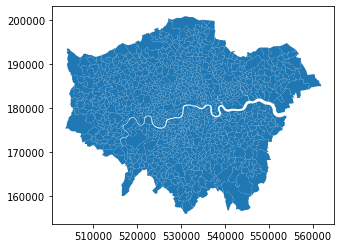

In [38]:
msoas.plot()

## 3. Spatial join 2020 airbnb to Boroughs

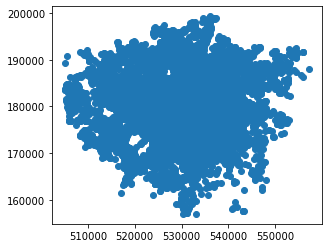

In [39]:
#change 2020 to gdf (point data) and set the coordinate ref system

gdf_2020airbnb = gpd.GeoDataFrame(df , geometry=gpd.points_from_xy (df ['longitude'], df ['latitude']), crs= 'EPSG:4326') #extarcr 
gdf_2020airbnb = gdf_2020airbnb.to_crs('epsg:27700')
gdf_2020airbnb.plot();

In [40]:
#Here we are joining our point data to the london msoa gdf shp file

gdf_2020airbnb_join = gpd.sjoin(gdf_2020airbnb, msoas, 
                       op='within',
                       how='left')
print(gdf_2020airbnb_join.columns.values)

['latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'availability_365' 'number_of_reviews_ltm'
 'calculated_host_listings_count' 'reviews_per_month'
 '2020_monthly_revenue' 'geometry' 'index_right' 'OBJECTID' 'MSOA11CD'
 'MSOA11NMW' 'LONG' 'LAT' 'Borough']


In [41]:
#look at the top columns
gdf_2020airbnb_join.head()

,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,2020_monthly_revenue,geometry,index_right,OBJECTID,MSOA11CD,MSOA11NMW,LONG,LAT,Borough
0,51.46225,-0.11732,Entire home/apt,87.0,2,236.0,8.0,2,1.51,262.74,POINT (530885.122 175377.940),611.0,612.0,E02000633,Lambeth 016,-0.11966,51.45936,Lambeth
1,51.56802,-0.11121,Private room,49.0,1,364.0,5.0,3,0.17,8.33,POINT (531005.968 187150.843),535.0,536.0,E02000556,Islington 003,-0.11392,51.56618,Islington
2,51.48796,-0.16898,Entire home/apt,75.0,10,359.0,3.0,1,0.68,510.00,POINT (527225.119 178145.995),574.0,575.0,E02000595,Kensington and Chelsea 019,-0.17318,51.48663,Kensington and Chelsea
3,51.52195,-0.14094,Entire home/apt,208.0,4,1.0,1.0,14,0.37,307.84,POINT (529075.790 181974.865),939.0,940.0,E02000972,Westminster 013,-0.13979,51.51508,Westminster
5,51.57224,-0.20906,Private room,29.0,10,1.0,7.0,3,1.02,295.80,POINT (524213.146 187449.516),58.0,59.0,E02000060,Barnet 037,-0.20910,51.57899,Barnet


In [42]:
gdf_2020airbnb_join.drop(columns=['latitude','longitude','availability_365','index_right','OBJECTID','LONG', 'LAT','MSOA11NMW'], inplace=True)
#gdf_airbnb.NAME.unique()

In [43]:
print(f"Data frame is {gdf_2020airbnb_join.shape[0]:,} x {gdf_2020airbnb_join.shape[1]}")


Data frame is 33,887 x 10


In [44]:
gdf_2020airbnb_join.head()

,room_type,price,minimum_nights,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,2020_monthly_revenue,geometry,MSOA11CD,Borough
0,Entire home/apt,87.0,2,8.0,2,1.51,262.74,POINT (530885.122 175377.940),E02000633,Lambeth
1,Private room,49.0,1,5.0,3,0.17,8.33,POINT (531005.968 187150.843),E02000556,Islington
2,Entire home/apt,75.0,10,3.0,1,0.68,510.00,POINT (527225.119 178145.995),E02000595,Kensington and Chelsea
3,Entire home/apt,208.0,4,1.0,14,0.37,307.84,POINT (529075.790 181974.865),E02000972,Westminster
5,Private room,29.0,10,7.0,3,1.02,295.80,POINT (524213.146 187449.516),E02000060,Barnet


In [45]:
#lets group by borough. count number of listings per borough
gdf_2020airbnb_group =  gdf_2020airbnb_join.groupby(['Borough']).agg(
    {'2020_monthly_revenue':['count']}
).reset_index()

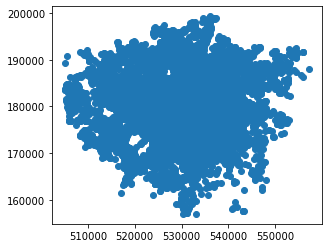

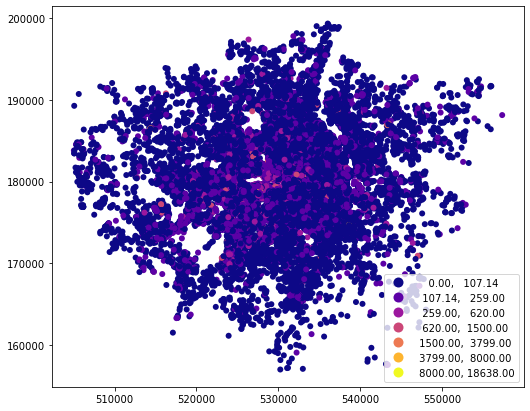

In [46]:
gdf_2020airbnb_join.plot()

gdf_2020airbnb_join.plot(column='price', cmap='plasma', 
         scheme='FisherJenks', k=7, edgecolor='None', legend=True, figsize=(9,7));
#house prices are concentrated more expensivly in west london

### count listings per borough

In [47]:
#count the number of listing per borough.`
gdf_2020airbnb_group.head()

,Borough,2020_monthly_revenue
,,count
0,Barking and Dagenham,152
1,Barnet,661
2,Bexley,102
3,Brent,1024
4,Bromley,254


In [48]:
#lets re-arrange the table

gdf_2020airbnb_group.columns = gdf_2020airbnb_group.columns.droplevel(0) #dropping the first level
print(gdf_2020airbnb_group.columns.values)

['' 'count']


In [49]:
gdf_2020airbnb_group.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0           33 non-null     object
 1   count   33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 656.0+ bytes


In [50]:
#renaming the cols manually
cols = gdf_2020airbnb_group.columns.values
cols[ 0] = 'Borough'
cols[ 1] = 'count_2020'
gdf_2020airbnb_group.columns = cols

gdf_2020airbnb_group.head()

,Borough,count_2020
0,Barking and Dagenham,152
1,Barnet,661
2,Bexley,102
3,Brent,1024
4,Bromley,254


## 4. 2014 Airbnb data

In [51]:
#read in the data
df_2014 = pd.read_csv('https://github.com/LoubnaSasso/FSDS_Assessment_3_Data/blob/main/Airbnb_2014.csv.gz?raw=true', compression='gzip')

In [52]:
print(f"Data frame is {df_2014.shape[0]:} x {df_2014.shape[1]}")

Data frame is 13237 x 14


In [53]:
#select active listings greater than 0 reviews

df_2014 = df_2014[(df_2014.reviews > 0)]

print(f"Data frame is {df_2014.shape[0]:,} x {df_2014.shape[1]}")
#now we have 8,8647 listings


Data frame is 8,649 x 14


In [54]:
#drop unwanted columns
df_2014.drop(columns=['host_id','room_id','neighborhood','accommodates','overall_satisfaction','bedrooms','last_modified'], axis=1, inplace=True) 

In [55]:
#convert object to catgory
cats2 = ['room_type']

#for every column in cats, convert the data datype to 'category'
for c in cats2:
    print(f"Converting {c}")
    df_2014[c] = df_2014[c].astype('category')

Converting room_type


In [56]:
#rename columns
df_2014.rename(columns={'room_type':'2014_room_type', 'reviews':'2014_reviews', 'reviews':'2014_reviews', 'price':'2014_price', 'minstay':'2014_minstay', 'latitude':'2014_latitude', 'longitude':'2014_longitude'  }, inplace=True)

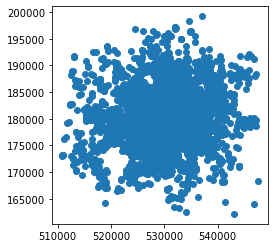

In [57]:
#change 2014 to gdf (point data)

gdf_2014airbnb = gpd.GeoDataFrame(df_2014 , geometry=gpd.points_from_xy (df_2014 ['2014_longitude'], df_2014 ['2014_latitude']), crs= 'EPSG:4326') #extarcr 
gdf_2014airbnb = gdf_2014airbnb.to_crs('epsg:27700')
gdf_2014airbnb.plot();


#### Spatial join to msoa

In [58]:
#Here we r st_joining out point data to the london msoa gdf shp file

gdf_2014airbnb_join = gpd.sjoin(gdf_2014airbnb, msoas, 
                       op='within',
                       how='left')
print(gdf_2014airbnb_join.columns.values)

['2014_room_type' 'borough' '2014_reviews' '2014_price' '2014_minstay'
 '2014_latitude' '2014_longitude' 'geometry' 'index_right' 'OBJECTID'
 'MSOA11CD' 'MSOA11NMW' 'LONG' 'LAT' 'Borough']


In [59]:
gdf_2014airbnb_join.drop(columns=['borough','index_right','OBJECTID','MSOA11NMW'], axis=1, inplace=True) 


In [60]:
gdf_2014airbnb_join.head()

,2014_room_type,2014_reviews,2014_price,2014_minstay,2014_latitude,2014_longitude,geometry,MSOA11CD,LONG,LAT,Borough
0,Private room,8,42,1,51.473306,-0.401079,POINT (511146.975 176138.922),E02000541,-0.38793,51.46980,Hounslow
1,Private room,167,123,2,51.574172,-0.129405,POINT (529727.500 187802.561),E02000429,-0.13561,51.57844,Haringey
2,Private room,77,151,1,51.482968,-0.174777,POINT (526836.501 177580.816),E02000597,-0.18267,51.48068,Kensington and Chelsea
3,Private room,55,61,2,51.587767,-0.105666,POINT (531333.289 189356.733),E02000419,-0.10475,51.58464,Haringey
4,Private room,1,104,1,51.466078,-0.133797,POINT (529729.719 175774.329),E02000629,-0.13310,51.46676,Lambeth


In [61]:
#group by borough

gdf_2014airbnb_join =  gdf_2014airbnb_join.groupby(['Borough']).agg(
    {'2014_price':['count']}
).reset_index()

In [62]:
gdf_2014airbnb_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   (Borough, )          29 non-null     object
 1   (2014_price, count)  29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes


In [63]:
#lets re-arrange the table

gdf_2014airbnb_join.columns = gdf_2014airbnb_join.columns.droplevel(0) #dropping the first level
print(gdf_2014airbnb_join.columns.values)

['' 'count']


In [64]:
#renaming the cols manually
cols = gdf_2014airbnb_join.columns.values
cols[ 0] = 'borough'
cols[ 1] = 'count_2014'
gdf_2014airbnb_join.columns = cols

gdf_2014airbnb_join.head()

,borough,count_2014
0,Barnet,91
1,Brent,223
2,Bromley,65
3,Camden,762
4,City of London,69


## 5. Join 2020 and 2014 Airbnb count data

In [65]:
#let join them
Airbnb_count = pd.merge(gdf_2020airbnb_group, gdf_2014airbnb_join,
                 left_on = 'Borough',
                 right_on = 'borough',
                        how = 'left')

print(Airbnb_count.shape)
print(type(Airbnb_count))


(33, 4)
<class 'pandas.core.frame.DataFrame'>


In [66]:
#drop column
Airbnb_count.drop(columns=['borough'], axis=1, inplace=True) 


In [67]:
Airbnb_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Borough     33 non-null     object 
 1   count_2020  33 non-null     int64  
 2   count_2014  29 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB


In [68]:
#change nan values in 2014 to 'O'
Airbnb_count['count_2014'] = Airbnb_count['count_2014'].fillna(0)

In [69]:
#Change 2014 in to integer
ints2  = ['count_2014']
for i in ints2:
    print(f"Converting {i}")
    try:
        Airbnb_count[i] = Airbnb_count[i].astype('float').astype('int')
    except ValueError as e:
        print("\tConverting to unsigned 16-bit integer.")
        Airbnb_count[i] = Airbnb_count[i].astype('float').astype(pd.UInt16Dtype())

Converting count_2014


In [70]:
Airbnb_count.head()

,Borough,count_2020,count_2014
0,Barking and Dagenham,152,0
1,Barnet,661,91
2,Bexley,102,0
3,Brent,1024,223
4,Bromley,254,65


## 6. Add 2020 and 2014 population data + rental prices 

In [71]:
#read in population data
population = pd.read_csv('https://github.com/LoubnaSasso/FSDS_Assessment_3_Data/blob/main/Population.csv.gz?raw=true', compression='gzip')

In [72]:
import pandas as pd

In [73]:
population.head()

,Borough,population_2020,population_2014
0,Barking and Dagenham,228596.6580,207990.5380
1,Barnet,407148.0000,375030.0000
2,Bexley,270564.3749,254777.4737
3,Brent,343853.0000,321601.0000
4,Bromley,336395.0000,321834.0000


In [74]:
#read in rent data
rent = pd.read_csv('https://github.com/LoubnaSasso/FSDS_Assessment_3_Data/blob/main/median_rent.csv.gz?raw=true', compression='gzip')

In [75]:
rent.head()

,Borough,median rent_2014,median rent_2020
0,Barking and Dagenham,836.0,1132.000000
1,Barnet,1264.0,1529.600000
2,Bexley,850.0,1007.000000
3,Brent,1307.5,1350.166667
4,Bromley,1025.0,1191.666667


In [76]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Borough           33 non-null     object 
 1   median rent_2014  33 non-null     float64
 2   median rent_2020  33 non-null     float64
dtypes: float64(2), object(1)
memory usage: 920.0+ bytes


### join together rent and population

In [77]:
population_rent =rent.join(population,  lsuffix='_caller', rsuffix='_other' )
#df.join(other, lsuffix='_caller', rsuffix='_other')

In [78]:
population_rent.head()

,Borough _caller,median rent_2014,median rent_2020,Borough _other,population_2020,population_2014
0,Barking and Dagenham,836.0,1132.000000,Barking and Dagenham,228596.6580,207990.5380
1,Barnet,1264.0,1529.600000,Barnet,407148.0000,375030.0000
2,Bexley,850.0,1007.000000,Bexley,270564.3749,254777.4737
3,Brent,1307.5,1350.166667,Brent,343853.0000,321601.0000
4,Bromley,1025.0,1191.666667,Bromley,336395.0000,321834.0000


In [79]:
population_rent.head()

,Borough _caller,median rent_2014,median rent_2020,Borough _other,population_2020,population_2014
0,Barking and Dagenham,836.0,1132.000000,Barking and Dagenham,228596.6580,207990.5380
1,Barnet,1264.0,1529.600000,Barnet,407148.0000,375030.0000
2,Bexley,850.0,1007.000000,Bexley,270564.3749,254777.4737
3,Brent,1307.5,1350.166667,Brent,343853.0000,321601.0000
4,Bromley,1025.0,1191.666667,Bromley,336395.0000,321834.0000


In [80]:
#drop columns
population_rent.drop(columns=['Borough _other'], inplace= True)


In [81]:
population_rent.head()

,Borough _caller,median rent_2014,median rent_2020,population_2020,population_2014
0,Barking and Dagenham,836.0,1132.000000,228596.6580,207990.5380
1,Barnet,1264.0,1529.600000,407148.0000,375030.0000
2,Bexley,850.0,1007.000000,270564.3749,254777.4737
3,Brent,1307.5,1350.166667,343853.0000,321601.0000
4,Bromley,1025.0,1191.666667,336395.0000,321834.0000


### join to Airbnb count

In [82]:
Airbnb_count.head()

,Borough,count_2020,count_2014
0,Barking and Dagenham,152,0
1,Barnet,661,91
2,Bexley,102,0
3,Brent,1024,223
4,Bromley,254,65


In [83]:
#let join them
Airbnb_pop_rent = pd.merge(Airbnb_count, population_rent,
                 left_on = 'Borough',
                 right_on = 'Borough _caller',
                        how = 'left')

print(Airbnb_pop_rent.shape)
print(type(Airbnb_pop_rent))

(33, 8)
<class 'pandas.core.frame.DataFrame'>


In [84]:
#drop column
Airbnb_pop_rent.drop(columns=['Borough _caller'], inplace= True)

In [85]:
Airbnb_pop_rent.head()

,Borough,count_2020,count_2014,median rent_2014,median rent_2020,population_2020,population_2014
0,Barking and Dagenham,152,0,836.0,1132.000000,228596.6580,207990.5380
1,Barnet,661,91,1264.0,1529.600000,407148.0000,375030.0000
2,Bexley,102,0,850.0,1007.000000,270564.3749,254777.4737
3,Brent,1024,223,1307.5,1350.166667,343853.0000,321601.0000
4,Bromley,254,65,1025.0,1191.666667,336395.0000,321834.0000


### Add density column per 10,000

In [86]:
#create density columns
Airbnb_pop_rent['density_2020']=((Airbnb_pop_rent.count_2020 / Airbnb_pop_rent.population_2020)*10000)
Airbnb_pop_rent['density_2014']=((Airbnb_pop_rent.count_2014 / Airbnb_pop_rent.population_2014)*10000)


In [87]:
# #rename columns
# Airbnb_pop_rent=Airbnb_pop_rent.rename(columns={"median_rent_2014": "median rent_2014"}, inplace =True)
# #Airbnb_pop_rent.rename(columns={"median_rent_2020": "median rent_2020"}, inplace =True)


In [88]:
Airbnb_pop_rent.head()

,Borough,count_2020,count_2014,median rent_2014,median rent_2020,population_2020,population_2014,density_2020,density_2014
0,Barking and Dagenham,152,0,836.0,1132.000000,228596.6580,207990.5380,6.649266,0.000000
1,Barnet,661,91,1264.0,1529.600000,407148.0000,375030.0000,16.234883,2.426473
2,Bexley,102,0,850.0,1007.000000,270564.3749,254777.4737,3.769898,0.000000
3,Brent,1024,223,1307.5,1350.166667,343853.0000,321601.0000,29.780168,6.934058
4,Bromley,254,65,1025.0,1191.666667,336395.0000,321834.0000,7.550647,2.019675


### add change from 2014 to 2020

In [89]:
#change in density concentration of listings
Airbnb_pop_rent['Density_Change']= (Airbnb_pop_rent['density_2020'] - Airbnb_pop_rent['density_2014'])
#change in median rent
Airbnb_pop_rent['Median_Rent_Change']= (Airbnb_pop_rent['median rent_2020'] - Airbnb_pop_rent['median rent_2014'])


Text(0, 0.5, 'Airbnb listings per 10,000 people')

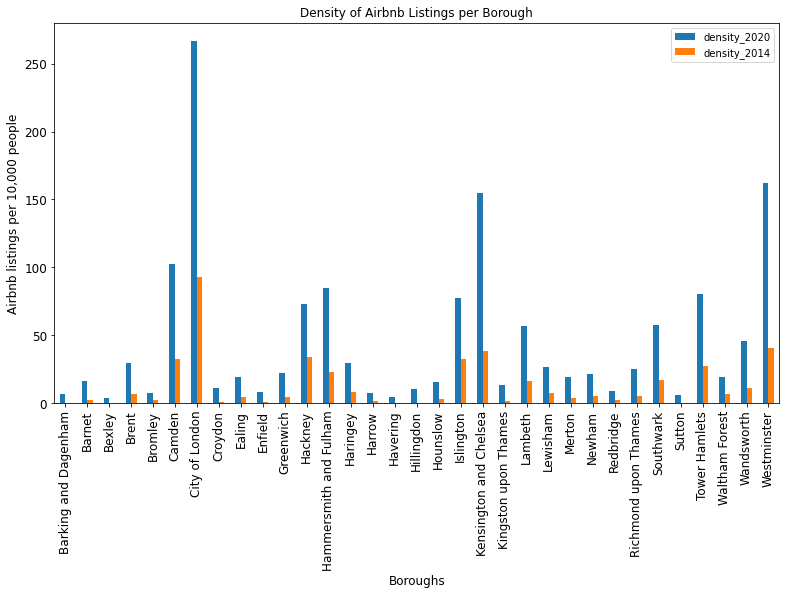

In [90]:
#plot the density for 2014 and 2020

ax =Airbnb_pop_rent[['Borough','density_2020', 'density_2014']].set_index('Borough').plot.bar(rot=90, title='Density of Airbnb Listings per Borough', figsize=(13,7), fontsize=12)

ax.set_xlabel("Boroughs",fontsize=12)
ax.set_ylabel("Airbnb listings per 10,000 people",fontsize=12)

Text(0, 0.5, 'Median rent (£)')

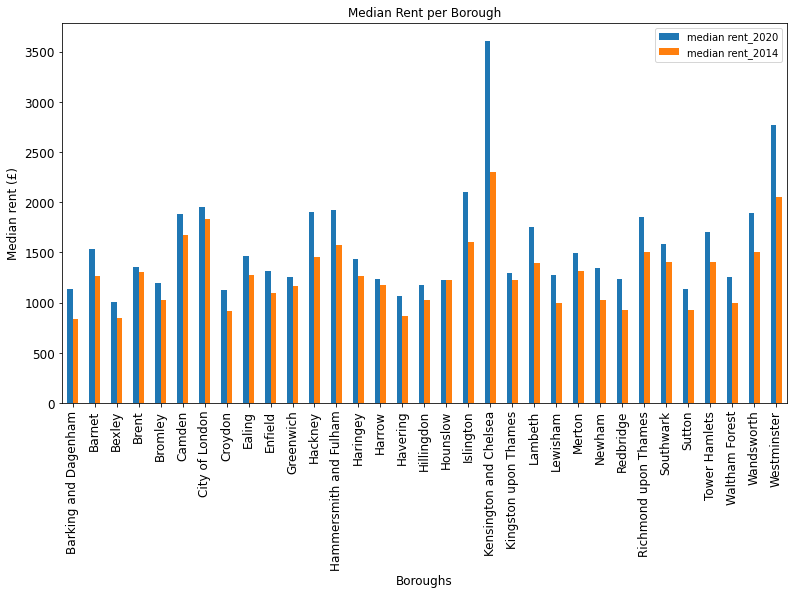

In [91]:
#plot the rent price for 2014 and 2020

ax =Airbnb_pop_rent[['Borough','median rent_2020', 'median rent_2014']].set_index('Borough').plot.bar(rot=90, title='Median Rent per Borough', figsize=(13,7), fontsize=12)

ax.set_xlabel("Boroughs",fontsize=12)
ax.set_ylabel("Median rent (£)",fontsize=12)

In [92]:
#spatial join Airbnb_pop_rent.head to msoa and borough
Airbnb_pop_rent.head()

,Borough,count_2020,count_2014,median rent_2014,median rent_2020,population_2020,population_2014,density_2020,density_2014,Density_Change,Median_Rent_Change
0,Barking and Dagenham,152,0,836.0,1132.000000,228596.6580,207990.5380,6.649266,0.000000,6.649266,296.000000
1,Barnet,661,91,1264.0,1529.600000,407148.0000,375030.0000,16.234883,2.426473,13.808410,265.600000
2,Bexley,102,0,850.0,1007.000000,270564.3749,254777.4737,3.769898,0.000000,3.769898,157.000000
3,Brent,1024,223,1307.5,1350.166667,343853.0000,321601.0000,29.780168,6.934058,22.846110,42.666667
4,Bromley,254,65,1025.0,1191.666667,336395.0000,321834.0000,7.550647,2.019675,5.530973,166.666667


In [93]:
gdf = pd.merge(msoas, Airbnb_pop_rent, left_on='Borough', right_on='Borough', how='inner')

print(f"Final MSOA Atlas data frame has shape {gdf.shape[0]:,} x {gdf.shape[1]}")

Final MSOA Atlas data frame has shape 983 x 17


Text(0, 0.5, 'Median rent (£)')

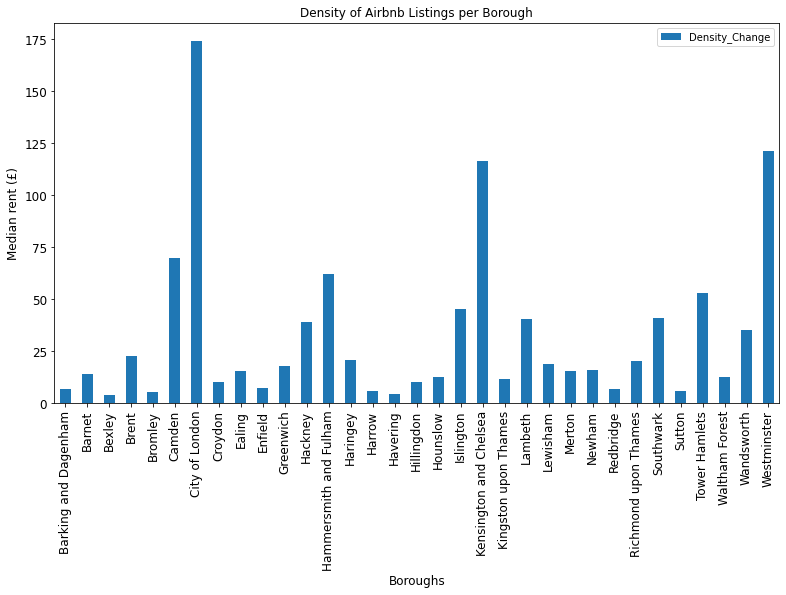

In [94]:
#plot density change

ax1 =Airbnb_pop_rent[['Density_Change','Borough']].set_index('Borough').plot.bar(rot=90, title='Density of Airbnb Listings per Borough', figsize=(13,7), fontsize=12)

ax1.set_xlabel("Boroughs",fontsize=12)
ax1.set_ylabel("Median rent (£)",fontsize=12)

Text(0.5, 1.0, 'Airbnb Listings Density Changes 2020-2014')

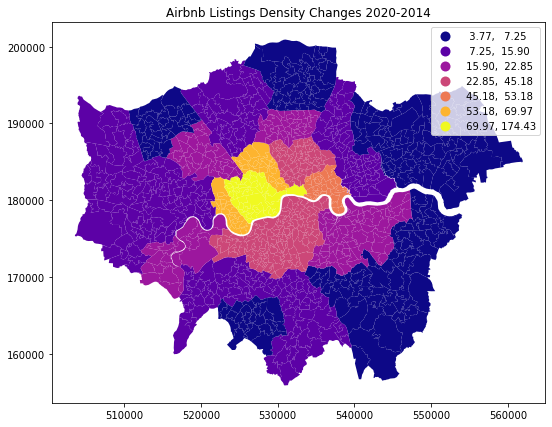

In [95]:

ax= gdf.plot(column='Density_Change', cmap='plasma', 
         scheme='FisherJenks', k=7, edgecolor='None', legend=True, figsize=(9,7));
ax.set_title(f'Airbnb Listings Density Changes 2020-2014')
#house prices are concentrated more expensivly in west london



Text(0, 0.5, 'Median rent change (£)')

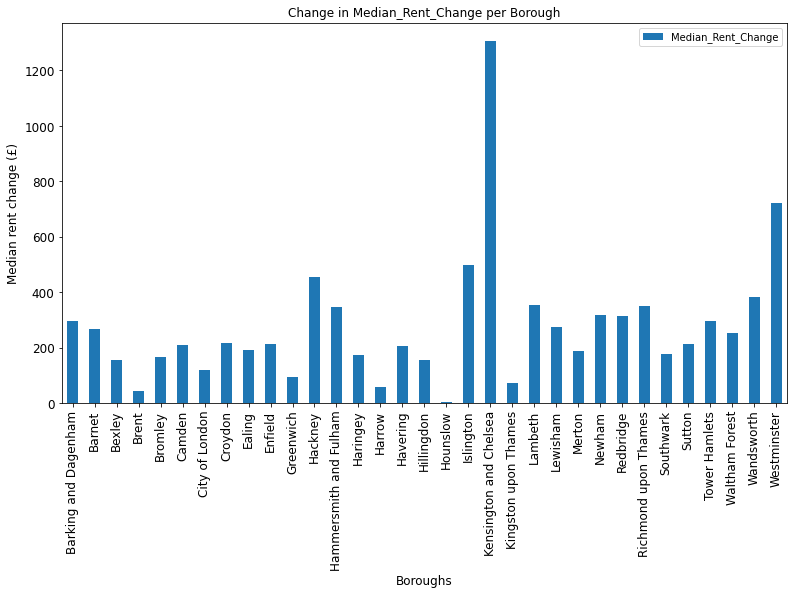

In [96]:
#plot rent change

ax1 =Airbnb_pop_rent[['Median_Rent_Change','Borough']].set_index('Borough').plot.bar(rot=90, title='Change in Median_Rent_Change per Borough', figsize=(13,7), fontsize=12)

ax1.set_xlabel("Boroughs",fontsize=12)
ax1.set_ylabel("Median rent change (£)",fontsize=12)

Text(0.5, 1.0, 'Median Rent Changes 2020-2014')

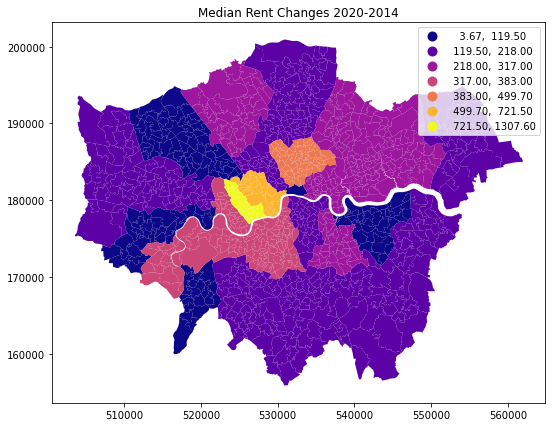

In [97]:
#plot median rent change

ax= gdf.plot(column='Median_Rent_Change', cmap='plasma', 
         scheme='FisherJenks', k=7, edgecolor='None', legend=True, figsize=(9,7));

ax.set_title(f'Median Rent Changes 2020-2014')

#house prices are concentrated more expensivly in west london

### create scatter plot
-   first look at correlation of change in density to change in rent
-   second look at correlation for the year 2020 alone

In [98]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model_1 = smf.ols(formula='Median_Rent_Change ~ Density_Change' ,data=Airbnb_pop_rent).fit()

# And this gives a big summary of the results:
print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:     Median_Rent_Change   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     10.56
Date:                Tue, 11 Jan 2022   Prob (F-statistic):            0.00278
Time:                        12:45:23   Log-Likelihood:                -221.48
No. Observations:                  33   AIC:                             447.0
Df Residuals:                      31   BIC:                             450.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        177.3473     46.748      3.

In [99]:
#get equation of the model
beta_0, beta_1 = multi_regression_model_1.params
rsq                    = multi_regression_model_1.rsquared
pval_0, pval_1 = multi_regression_model_1.pvalues

#print outcomes
print("y =", round(beta_1,3), "x +", round(beta_0,3)) #beta is the coefficient
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))

y = 3.041 x + 177.347
R^2     =  0.25407426277853096
p-value_1 =  0.003


y = 3.041 x + 177.347
Rsq =  0.25407426277853096
p-value =  0.0027819717263596806


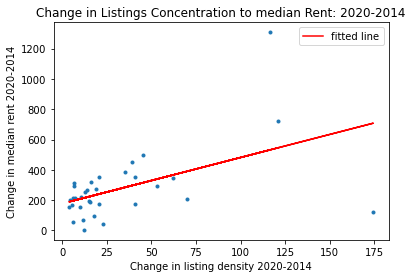

In [100]:
import scipy.stats as sps

#set x and y values
X = Airbnb_pop_rent['Density_Change']
Y = Airbnb_pop_rent['Median_Rent_Change']
X=X.astype(float)

#add labels
plt.xlabel('Change in listing density 2020-2014')
plt.ylabel('Change in median rent 2020-2014')

#plt
a = plt.plot(X,Y,'.')

#values to extract 
slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

#legend and title
plt.title("Change in Listings Concentration to median Rent: 2020-2014")
plt.legend()

#plt.savefig("2019 to 2020 regression")

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

### correlation for 2020

y = 6.888 x + 1248.053
Rsq =  0.5547389373574397
p-value =  6.671460492297454e-07


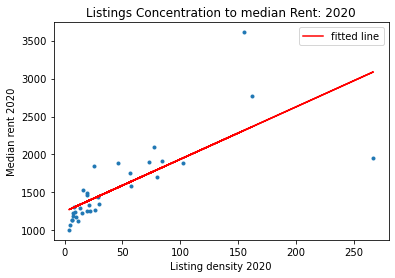

In [101]:
import scipy.stats as sps

#set x and y
X = Airbnb_pop_rent['density_2020']
Y = Airbnb_pop_rent['median rent_2020']
X=X.astype(float)

#add labels
plt.xlabel('Listing density 2020')
plt.ylabel('Median rent 2020')

a = plt.plot(X,Y,'.')


slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.title("Listings Concentration to median Rent: 2020")
plt.legend()

#plt.savefig("2019 to 2020 regression")

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

## 7. Compare Commercial Airbnb average monthly revenue and the median monthly asking price: 
-   We have median price. 
-   we need to get the month;y revenue: 
-        first select only commercial listings 
           •Filter Entire home/Apt +min 58 nights/yrs. (reviews as a proxy for no of visitors-tom)
           •Filter Private/Shared +88 nights/yrs. (reviews as a proxy-tom) (this can be added after)

-        then calculate the revenue (price per day * min stay * reviews per month) 

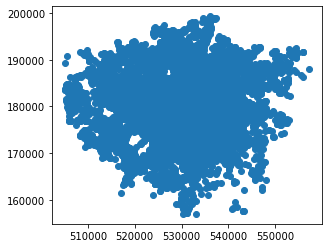

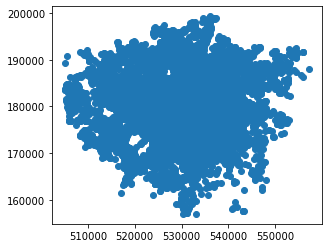

In [102]:
#change 2020 to gdf (point data)

#covert to spatial data and set crs
gdf_2020airbnb = gpd.GeoDataFrame(df , geometry=gpd.points_from_xy (df ['longitude'], df ['latitude']), crs= 'EPSG:4326') #extarcr 
gdf_2020airbnb = gdf_2020airbnb.to_crs('epsg:27700')
gdf_2020airbnb.plot();



#change 2020 to gdf (point data)
gdf_2020airbnb = gpd.GeoDataFrame(df , geometry=gpd.points_from_xy (df ['longitude'], df ['latitude']), crs= 'EPSG:4326') #extarcr 
gdf_2020airbnb = gdf_2020airbnb.to_crs('epsg:27700')
gdf_2020airbnb.plot();

In [103]:
df.head()

,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,2020_monthly_revenue,geometry
0,51.46225,-0.11732,Entire home/apt,87.0,2,236.0,8.0,2,1.51,262.74,POINT (-0.11732 51.46225)
1,51.56802,-0.11121,Private room,49.0,1,364.0,5.0,3,0.17,8.33,POINT (-0.11121 51.56802)
2,51.48796,-0.16898,Entire home/apt,75.0,10,359.0,3.0,1,0.68,510.00,POINT (-0.16898 51.48796)
3,51.52195,-0.14094,Entire home/apt,208.0,4,1.0,1.0,14,0.37,307.84,POINT (-0.14094 51.52195)
5,51.57224,-0.20906,Private room,29.0,10,1.0,7.0,3,1.02,295.80,POINT (-0.20906 51.57224)


In [104]:
commercial_listings=df

In [105]:
#create new columns: minimum nights stay * reviews per year= aprox min visits a year
commercial_listings['min_visits_yr'] = (commercial_listings.minimum_nights * commercial_listings.number_of_reviews_ltm)
commercial_listings.sample(6, random_state=42) 

,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,2020_monthly_revenue,geometry,min_visits_yr
24839,51.40798,0.06361,Entire home/apt,75.0,1,361.0,10.0,1,1.53,114.75,POINT (0.06361 51.40798),10.0
71648,51.46341,-0.11076,Entire home/apt,100.0,2,0.0,4.0,2,2.67,534.00,POINT (-0.11076 51.46341),8.0
1253,51.51334,-0.12649,Entire home/apt,250.0,3,356.0,7.0,6,1.75,1312.50,POINT (-0.12649 51.51334),21.0
59885,51.52928,-0.21910,Entire home/apt,69.0,3,53.0,1.0,1,0.12,24.84,POINT (-0.21910 51.52928),3.0
26543,51.44839,-0.14143,Private room,39.0,30,365.0,1.0,5,0.10,117.00,POINT (-0.14143 51.44839),30.0
36797,51.44653,-0.12334,Private room,29.0,2,179.0,8.0,1,1.20,69.60,POINT (-0.12334 51.44653),16.0


In [106]:
#we only want listings that are 'commercial' listings

commercial_listings = commercial_listings[(commercial_listings.room_type=='Entire home/apt') & (commercial_listings.min_visits_yr>57) | (commercial_listings.room_type=='Private room') & (commercial_listings.min_visits_yr>87)|
(commercial_listings.room_type=='Shared room') & (commercial_listings.min_visits_yr>87)] 

print(f"Data frame is {commercial_listings.shape[0]:,} x {commercial_listings.shape[1]}")

#have a look ata sample
commercial_listings.sample(6, random_state=42)

#total of 1099 commercial listing


Data frame is 1,099 x 12


,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,2020_monthly_revenue,geometry,min_visits_yr
36711,51.48219,-0.09313,Entire home/apt,50.0,25,0.0,5.0,1,0.33,412.50,POINT (-0.09313 51.48219),125.0
60578,51.48555,-0.20114,Entire home/apt,109.0,3,151.0,25.0,11,2.50,817.50,POINT (-0.20114 51.48555),75.0
30090,51.48585,-0.16171,Entire home/apt,168.0,3,365.0,25.0,14,2.34,1179.36,POINT (-0.16171 51.48585),75.0
39987,51.52553,-0.15959,Entire home/apt,147.0,4,184.0,16.0,1,2.06,1211.28,POINT (-0.15959 51.52553),64.0
27996,51.53200,-0.11854,Private room,47.0,2,0.0,47.0,2,5.60,526.40,POINT (-0.11854 51.53200),94.0
41920,51.51411,-0.47781,Entire home/apt,79.0,90,0.0,4.0,1,1.24,8816.40,POINT (-0.47781 51.51411),360.0


In [107]:
#now for all commercial listings, we want to calculate the average reenue per borough

#lets creat a new field
commercial_listings['revenue_2020'] = (commercial_listings.price * commercial_listings.minimum_nights * commercial_listings.reviews_per_month)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [108]:
commercial_listings.head()

,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,2020_monthly_revenue,geometry,min_visits_yr,revenue_2020
71,51.49494,-0.12004,Entire home/apt,95.0,20,83.0,9.0,1,0.79,1501.00,POINT (-0.12004 51.49494),180.0,1501.00
126,51.52407,-0.10554,Entire home/apt,93.0,4,205.0,18.0,4,4.20,1562.40,POINT (-0.10554 51.52407),72.0,1562.40
127,51.52116,-0.18359,Entire home/apt,159.0,2,330.0,47.0,1,4.25,1351.50,POINT (-0.18359 51.52116),94.0,1351.50
136,51.55730,-0.14269,Entire home/apt,120.0,90,0.0,5.0,1,1.81,19548.00,POINT (-0.14269 51.55730),450.0,19548.00
179,51.49519,-0.19242,Entire home/apt,79.0,2,287.0,32.0,1,2.84,448.72,POINT (-0.19242 51.49519),64.0,448.72


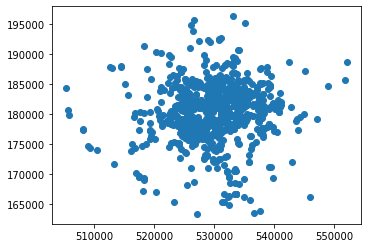

In [109]:
commercial_gdf = gpd.GeoDataFrame(commercial_listings , geometry=gpd.points_from_xy (commercial_listings ['longitude'], commercial_listings ['latitude']), crs= 'EPSG:4326') #extarcr 
commercial_gdf = commercial_gdf.to_crs('epsg:27700')
commercial_gdf.plot();

In [110]:
# fig, ax = plt.subplots(1,1, figsize=(12,9))   #1,1 means overlay the below maps in 1 col,1row..so over each other

# # Plot all three to the same axes
# boros.plot(facecolor = 'white', edgecolor='red', linewidth=2.5, ax=ax)  #ax=ax means you u take your contemt, and plot it in to ax defined subplot boundary
# #water.plot(facecolor = '#13EAC9', edgecolor='none', ax=ax)
# #green.plot(facecolor = 'green', edgecolor='none', alpha=0.5,ax=ax)

# # Set the limits
# # ax.set_xlim([501000, 563000])
# ax.set_ylim([155000, 202000])

# #save figure 
# plt.savefig(os.path.join("img","first_map.png"))

In [111]:
#fig, ax = plt.subplots(1,1, figsize=(12,9))   #1,1 means overlay the below maps in 1 col,1row..so over each other


Text(0.5, 1.0, 'Commercial Listings 2020')

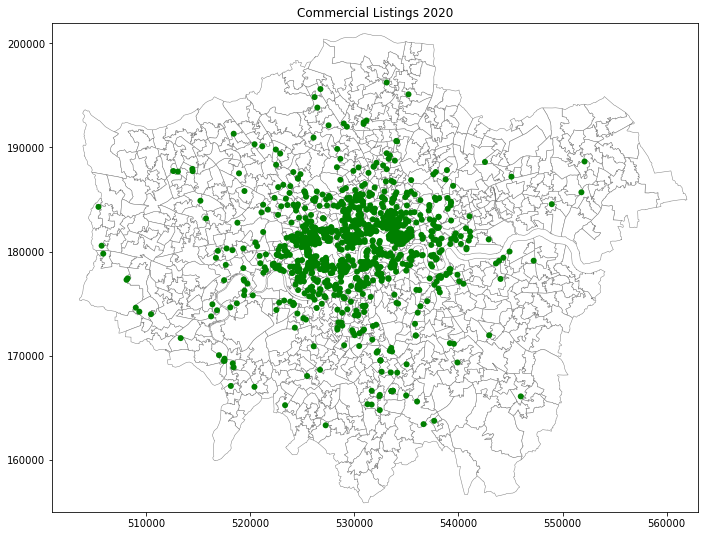

In [112]:
fig, ax = plt.subplots(1,1, figsize=(12,9))   #1,1 means overlay the below maps in 1 col,1row..so over each other

#commercial_gdf.plot(figsize=(12,8), marker='*', color='green', markersize=0.25, )
msoas.plot(facecolor = 'white', edgecolor='grey', linewidth=0.5, ax=ax)  #ax=ax means you u take your contemt, and plot it in to ax defined subplot boundary
commercial_gdf.plot(facecolor = 'green', edgecolor='none', linewidth=0.1, legend=True, ax=ax)

# Set the limits
ax.set_xlim([501000, 563000])
ax.set_ylim([155000, 202000])

ax.set_title(f'Commercial Listings 2020')

#save figure 
#plt.savefig(os.path.join("img","first_map.png"))

In [113]:
commercial_gdf_join = gpd.sjoin(commercial_gdf, msoas, 
                       op='within',
                       how='left')
print(commercial_gdf_join.columns.values)

['latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'availability_365' 'number_of_reviews_ltm'
 'calculated_host_listings_count' 'reviews_per_month'
 '2020_monthly_revenue' 'geometry' 'min_visits_yr' 'revenue_2020'
 'index_right' 'OBJECTID' 'MSOA11CD' 'MSOA11NMW' 'LONG' 'LAT' 'Borough']


In [114]:
commercial_gdf_join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1099 entries, 71 to 72200
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   latitude                        1099 non-null   float64 
 1   longitude                       1099 non-null   float64 
 2   room_type                       1099 non-null   category
 3   price                           1099 non-null   float64 
 4   minimum_nights                  1099 non-null   int64   
 5   availability_365                1099 non-null   float64 
 6   number_of_reviews_ltm           1099 non-null   float64 
 7   calculated_host_listings_count  1099 non-null   int64   
 8   reviews_per_month               1099 non-null   float64 
 9   2020_monthly_revenue            1099 non-null   float64 
 10  geometry                        1099 non-null   geometry
 11  min_visits_yr                   1099 non-null   float64 
 12  revenue_20

In [115]:
#group by borough

commercial_gdf_group =  commercial_gdf_join.groupby(['Borough']).agg(
    {'revenue_2020':['mean']}
).reset_index()

In [116]:
commercial_listings_group = commercial_gdf_group 

In [117]:
#lets re-arrange the table

commercial_listings_group.columns = commercial_listings_group.columns.droplevel(0) #dropping the first level
print(commercial_listings_group.columns.values)

['' 'mean']


In [118]:
#renaming the cols manually
cols = gdf_2020airbnb_group.columns.values
cols[ 0] = 'Borough'
cols[ 1] = 'mean_revenue_2020'
commercial_listings_group.columns = cols

commercial_listings_group.head()

,Borough,mean_revenue_2020
0,Barking and Dagenham,320.880000
1,Barnet,549.791920
2,Brent,1631.391000
3,Bromley,1242.997500
4,Camden,5670.812908


In [119]:
### now join commercial_listings_group revenue to median rent price
commercial_listings_join = pd.merge(Airbnb_pop_rent, commercial_listings_group,
                 left_on = 'Borough',
                 right_on = 'Borough',
                        how = 'left')

print(commercial_listings_join.shape)
print(type(commercial_listings_join))

(33, 12)
<class 'pandas.core.frame.DataFrame'>


In [120]:
commercial_listings_join

#need to drop nan values.

commercial_listings_join.drop(commercial_listings_join[commercial_listings_join.mean_revenue_2020.isna()].index.values, axis=0, inplace=True) 


In [121]:
print(commercial_listings_join.shape)


(32, 12)


In [122]:
commercial_listings_join


,Borough,count_2020,count_2014,median rent_2014,median rent_2020,population_2020,population_2014,density_2020,density_2014,Density_Change,Median_Rent_Change,mean_revenue_2020
0,Barking and Dagenham,152,0,836.0,1132.000000,228596.658000,207990.538000,6.649266,0.000000,6.649266,296.000000,320.880000
1,Barnet,661,91,1264.0,1529.600000,407148.000000,375030.000000,16.234883,2.426473,13.808410,265.600000,549.791920
3,Brent,1024,223,1307.5,1350.166667,343853.000000,321601.000000,29.780168,6.934058,22.846110,42.666667,1631.391000
4,Bromley,254,65,1025.0,1191.666667,336395.000000,321834.000000,7.550647,2.019675,5.530973,166.666667,1242.997500
5,Camden,2636,762,1677.0,1886.166667,257384.000000,234845.000000,102.415069,32.446933,69.968135,209.166667,5670.812908
6,City of London,233,69,1830.5,1950.000000,8726.071467,7452.841551,267.015920,92.582137,174.433783,119.500000,3676.900889
7,Croydon,456,39,912.5,1130.500000,400272.000000,376040.000000,11.392253,1.037124,10.355130,218.000000,990.898889
8,Ealing,706,146,1275.0,1466.666667,361833.000000,342469.000000,19.511764,4.263160,15.248604,191.666667,1484.289914
9,Enfield,292,37,1100.0,1313.400000,348802.687900,330148.990300,8.371495,1.120706,7.250789,213.400000,1825.935714
10,Greenwich,696,127,1162.5,1255.833333,311653.501700,286304.868000,22.332494,4.435831,17.896663,93.333333,2336.844123


In [123]:
#droping outliers: Haringey


# Get names of indexes for which column borough is haringey
indexNames = commercial_listings_join[ commercial_listings_join['Borough'] == 'Haringey' ].index
# Delete these row indexes from dataFrame
commercial_listings_join.drop(indexNames , inplace=True)

Text(0, 0.5, 'Median rent (£)')

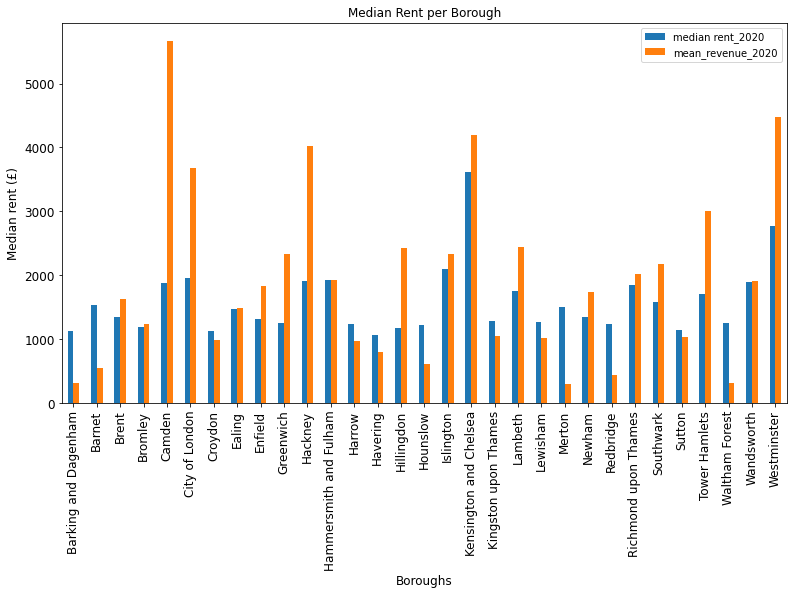

In [124]:
#plot the rent price for 2014 and 2020

ax =commercial_listings_join[['Borough','median rent_2020', 'mean_revenue_2020']].set_index('Borough').plot.bar(rot=90, title='Median Rent per Borough', figsize=(13,7), fontsize=12)

ax.set_xlabel("Boroughs",fontsize=12)
ax.set_ylabel("Median rent (£)",fontsize=12)

### correlation graph

y = 0.279 x + 1051.707
Rsq =  0.4988853224142016
p-value =  8.993860334082616e-06


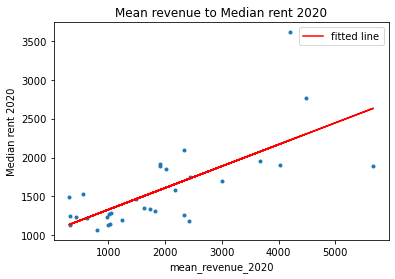

In [125]:
import scipy.stats as sps

#x and y values
X = commercial_listings_join['mean_revenue_2020']
Y = commercial_listings_join['median rent_2020']
X=X.astype(float)

#add labels
plt.xlabel('mean_revenue_2020')
plt.ylabel('Median rent 2020')

a = plt.plot(X,Y,'.')

#extract these values
slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.title("Mean revenue to Median rent 2020")
plt.legend()

#plt.savefig("2019 to 2020 regression")

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)